# GridSearchCV and feature importance With Random Forest  

# Importing 

In [6]:
from sklearn.grid_search import GridSearchCV
from sklearn import cross_validation
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
import time 
import pandas as pd
import os 
import joblib
# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=4,
                           n_redundant=2,
                           n_repeated=0,
                           n_classes=5,
                           random_state=0,
                           shuffle=True)




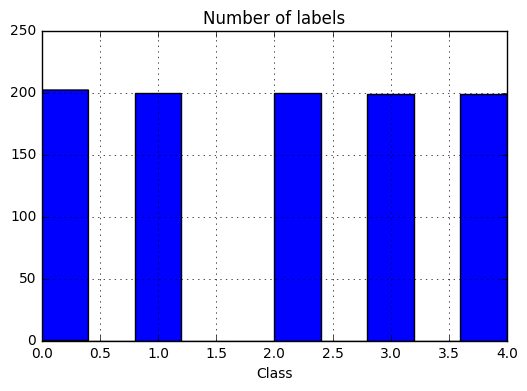

In [10]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
y1=pd.Series(y)
plt.figure()
plt.title("Number of labels")
plt.xlabel("Class")

y1.hist()

In [11]:
Data=pd.DataFrame(data=X)

In [12]:
Data['label']=y

In [13]:
Data.head()

,0,1,2,3,4,5,6,7,8,9,label
0,-0.297275,0.078537,-1.609503,1.309822,2.897698,1.957175,1.319689,-0.974391,-2.575116,2.149621,0
1,1.268401,-0.757177,-1.420165,0.687173,0.437026,0.792212,-1.123119,-0.762158,0.261972,-1.146857,0
2,1.423518,-0.576194,-0.040657,0.227772,-1.477213,0.294565,0.953280,-0.931945,0.305549,-0.546724,1
3,1.205537,-1.584875,0.259777,0.557533,-2.216310,0.232241,1.512892,-2.649221,1.242863,0.854436,1
4,0.481921,0.816688,-1.343129,-0.631835,2.659149,3.791746,2.115324,-0.911025,-4.271846,-0.765841,1


# Tunning and finding best Model

In [15]:
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True, verbose=True) 

param_grid = { 
    'n_estimators': [50,100],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split':[3,5]
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X, y)
print (CV_rfc.best_params_)

[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jo

{'min_samples_split': 5, 'max_features': 'sqrt', 'n_estimators': 100}


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


{'min_samples_split': 5, 'max_features': 'sqrt', 'n_estimators': 100}

# Using the Best Random forest Parameters 

In [19]:
clf=RandomForestClassifier(min_samples_split=5, n_estimators= 100, max_features= 'sqrt')
start=time.time()
clf.fit(X, y)
print("=============Traning Time =================================")
print ("Training time = ", time.time()-start, "Seconds")
print("=============Random Forest Classifier Parameters===========")
print(clf)
print ("Cross validation score =", cross_validation.cross_val_score(clf, X ,y, cv=10).mean())
print("===========================================================")

=============Traning Time =================================
Training time =  0.36162805557250977 Seconds
=============Random Forest Classifier Parameters===========
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Cross validation score = 0.96200930093


# Feature Importance (Most informative) 

Feature ranking:
1. feature 9 (0.253043)
2. feature 8 (0.184471)
3. feature 5 (0.158574)
4. feature 6 (0.120982)
5. feature 4 (0.112122)
6. feature 7 (0.100069)
7. feature 3 (0.018770)
8. feature 0 (0.017899)
9. feature 2 (0.017039)
10. feature 1 (0.017031)


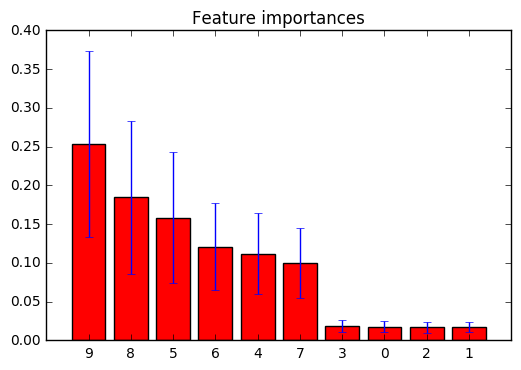

In [20]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# Save the Model (Pickle or PMML)

In [21]:
joblib.dump(clf, os.path.join("models","RFclfDemo01.pkl"))

['models/RFclfDemo01.pkl']

# Use the Model for future prediction 

In [22]:
clfLOAD=joblib.load(os.path.join("models","RFclfDemo01.pkl"))

In [23]:
def predict(Fetures):
    starttime=time.time()
    result=np.asscalar(clfLOAD.predict(Fetures))
    timepred=time.time()-starttime
    return result, timepred

In [92]:
print("Instace features =",X[100,:])
print("Instance label =", y[100])
print("Predicted label =", predict([X[100,:]])[0])
print("Time for prediction =", predict([X[100,:]])[1], " Sec")
Cores,Mem=getmemcors()
print ("Verural Memory = ", Mem, "GB" )
print ("Number of cores = ", Cores, "cores" )

Instace features = [ 0.25054819  1.84486108  0.89684323 -0.06067939  0.6249703   0.55549315
 -1.25159269 -1.07970421  0.60689317 -0.30037409]
Instance label = 0
Predicted label = 0
Time for prediction = 0.020795106887817383  Sec
Verural Memory =  2 GB
Number of cores =  2 cores


In [94]:
for i in range(5):
    PR, timeP=predict([X[i,:]])
    print("Time needed to predict =", timeP)
    print("Prediction =", PR)
    print("Prediction was", PR==y[i])

Time needed to predict = 0.0244596004486084
Prediction = 0
Prediction was True
Time needed to predict = 0.025342702865600586
Prediction = 0
Prediction was True
Time needed to predict = 0.020415067672729492
Prediction = 1
Prediction was True
Time needed to predict = 0.017598867416381836
Prediction = 1
Prediction was True
Time needed to predict = 0.0157167911529541
Prediction = 1
Prediction was True


# Getting memery and cores 

In [91]:
import multiprocessing
import os
import math
def getmemcors():
    mem_bytes = os.sysconf('SC_PAGE_SIZE') * os.sysconf('SC_PHYS_PAGES')  # e.g. 4015976448
    mem_gib = mem_bytes/(1024.**3) 
    numprocss=multiprocessing.cpu_count()
    return numprocss, math.ceil(mem_gib)